# Luiz Henrique dos Santos Faleiros
# Gu 3003825

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [121]:
penguins = sns.load_dataset('penguins')

Veja as informações do dataset

In [122]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [123]:
penguins = penguins.dropna()

In [124]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [125]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Realize a analise exploratória dos dados

<AxesSubplot:xlabel='species', ylabel='count'>

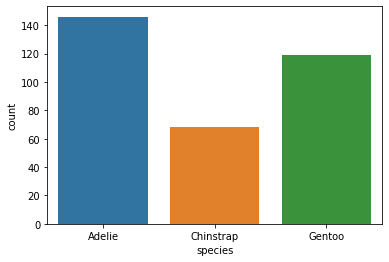

In [126]:
sns.countplot(x=penguins['species'])

<AxesSubplot:xlabel='species', ylabel='count'>

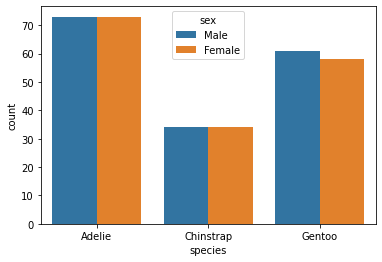

In [127]:
sns.countplot(x=penguins['species'],hue=penguins['sex'])

In [128]:
penguins=pd.get_dummies(penguins,columns=['sex','island'],drop_first=True)

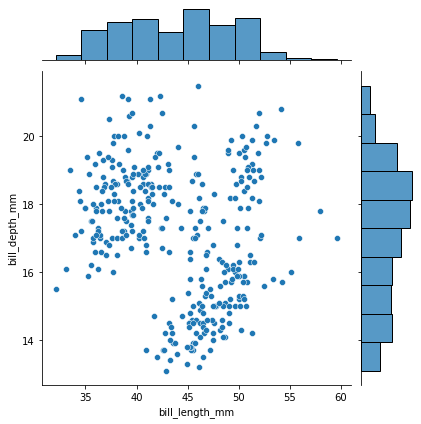

In [129]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm',data=penguins)

Divida os dados em conjunto de treinamento e teste

In [130]:
scale=StandardScaler()
scale.fit(penguins.drop(['species'],axis=1))
transformed=scale.transform(penguins.drop(['species'],axis=1))
df_scaled=pd.DataFrame(transformed,columns=penguins.columns[1:])

In [131]:
X=df_scaled
y=penguins['species']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

Crie o modelo de KNN

In [132]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
out1=knn.predict(x_test)

c:\Estudos\python\pythonPandas\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [134]:
print(classification_report(y_test,out1))
print(confusion_matrix(y_test,out1))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        43
   Chinstrap       0.97      1.00      0.98        31
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

[[42  1  0]
 [ 0 31  0]
 [ 0  0 36]]


In [136]:
error_rate=[]

for i in range(1,20):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train,y_train)
    out_i=knn_i.predict(x_test)
    error_rate.append(np.mean(out_i!=y_test))

c:\Estudos\python\pythonPandas\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Estudos\python\pythonPandas\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Estudos\python\pythonPandas\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Estudos\python\pythonPandas\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Estudos\python\pythonPandas\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Estudos\pyth

Text(0.5, 1.0, 'Best KNeighbors')

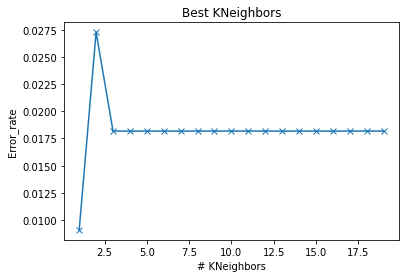

In [137]:
plt.plot(range(1,20),error_rate,marker='x',markerfacecolor='red')
plt.xlabel('# KNeighbors')
plt.ylabel('Error_rate')
plt.title('Best KNeighbors')